In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
random.seed(29)

In [2]:
def random_photo_per_class(path):
    random_images = []
    for root, dirs, files in os.walk(path):
        if root[-5:] != "train":
            image = random.choice(os.listdir("{}".format(root)))
            random_images.append(str(root)+os.sep+str(image))
    return random_images


In [3]:
random_photo_per_class("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train")

['C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Black-grass\\d622ca3d2-rot-180.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Charlock\\1aae936b7-rot-90-hflip.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Cleavers\\796b61337-rot-90-hflip.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Common Chickweed\\c41644ed6vertflip.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Common wheat\\872174e0f-rot-270.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Fat Hen\\23525c578-rot-90vertflip.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Loose Silky-bent\\9dc674d5d-rot-90.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Maize\\919e154c2-rot-180vertflip-hflip.png',
 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognit

In [4]:
examples = random_photo_per_class("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train")

In [39]:
p = os.path.dirname("C:/Users/sjcrum/Documents/Data Science Capstone/PlantImages/train\\Black-grass\\b024eeb75-rot-180vertflip-hflip.png")
p.rsplit('\\', 1)[-1]

'Black-grass'

Black-grass
(603, 603, 3)


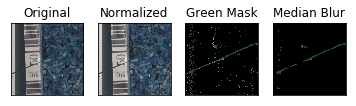

Charlock
(721, 721, 3)


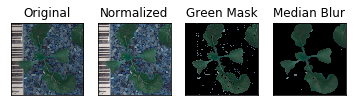

Cleavers
(200, 200, 3)


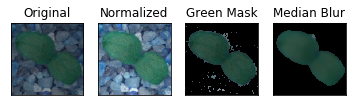

Common Chickweed
(432, 432, 3)


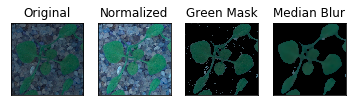

Common wheat
(584, 584, 3)


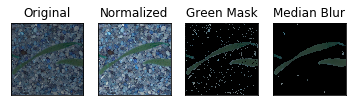

Fat Hen
(193, 193, 3)


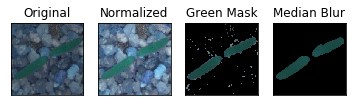

Loose Silky-bent
(186, 186, 3)


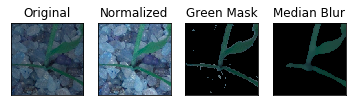

Maize
(1558, 1558, 3)


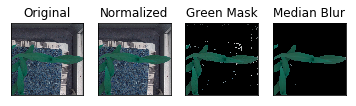

Scentless Mayweed
(74, 74, 3)


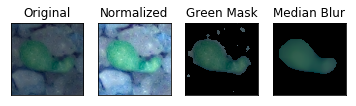

Shepherds Purse
(173, 173, 3)


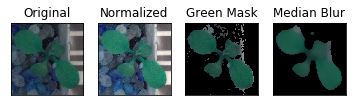

Small-flowered Cranesbill
(271, 271, 3)


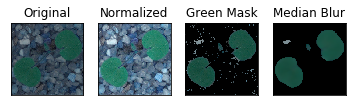

Sugar beet
(1434, 1434, 3)


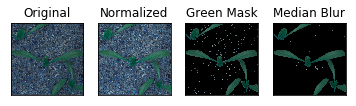

In [30]:
for image in examples:
    directory = os.path.dirname(image)
    species = directory.rsplit('\\', 1)[-1]
    print(species)
    im = cv2.imread(image)
    
    norm_im = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    print(norm_im.shape)
    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    RGB_norm_img = cv2.cvtColor(norm_im, cv2.COLOR_BGR2RGB)
            
    hsv = cv2.cvtColor(norm_im, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (40, 0, 0), (110, 255, 200))
    imask = mask>0
    green = np.zeros_like(im, np.uint8)
    green[imask] = im[imask]
    
    medblur = cv2.medianBlur(green, 15)
    
    #edges = cv2.Canny(green,50,100)

    plt.subplot(141),plt.imshow(im)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(norm_im)
    plt.title('Normalized'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(green)
    plt.title('Green Mask'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(medblur)
    plt.title('Median Blur'), plt.xticks([]), plt.yticks([])

    plt.show()

In [33]:
def extract_file_paths(path):
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "png" or file[-3:] == "PNG"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))

image_filenames = extract_file_paths("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages")

50884


In [18]:
for image in image_filenames:

    im = cv2.imread(image)
    
    norm_im = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #print(norm_im.shape)
            
    hsv = cv2.cvtColor(norm_im, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (40, 0, 0), (110, 255, 200))
    imask = mask>0
    green = np.zeros_like(im, np.uint8)
    green[imask] = im[imask]
    
    medblur = cv2.medianBlur(green, 15)
    
    new_path = "E:/" + image.split('/', 5)[-1]
    #print(new_path)
    
    cv2.imwrite(new_path, medblur)

NameError: name 'image_filenames' is not defined

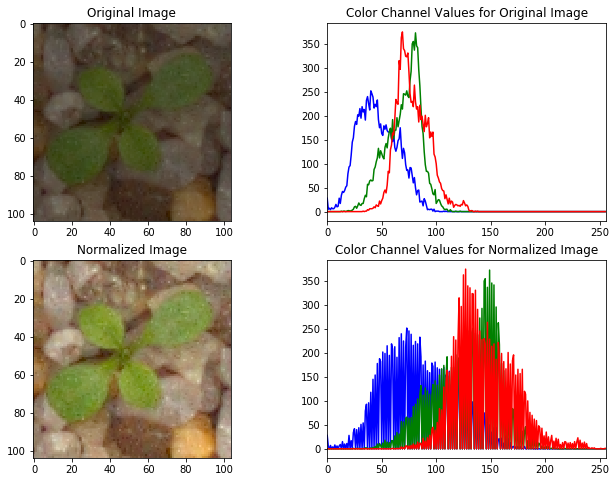

In [89]:
sample_image = cv2.imread("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/test/Shepherds Purse/3e0ccc451.png", 1)
norm_im = cv2.normalize(sample_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
RGB_im = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
RGB_norm_im = cv2.cvtColor(norm_im, cv2.COLOR_BGR2RGB)

f, axs = plt.subplots(2,2,figsize=(11,8))
plt.subplot(221)
plt.imshow(RGB_im)
plt.title('Original Image')
plt.subplot(222)
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([sample_image],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Color Channel Values for Original Image')

plt.subplot(223)
plt.imshow(RGB_norm_im.astype(np.uint8))
plt.title('Normalized Image')
plt.subplot(224)
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([norm_im],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Color Channel Values for Normalized Image')
plt.show()